In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def load_data(exp_no):
    df_ad = pd.read_csv(f'plots/exp{exp_no}.anc_desc.csv')
    df_dl = pd.read_csv(f'plots/exp{exp_no}.diff_lin.csv')
    df_mp3 = pd.read_csv(f'plots/exp{exp_no}.mp3.csv')
    df_ll = pd.read_csv(f'plots/exp{exp_no}.loglikelihood.csv')

    #re-order to keep color consistency
    df_ll = df_ll[["reSASC", "Dollo-k", "PP", "Measure"]]

    return df_ad, df_dl, df_mp3, df_ll

In [3]:
def boxplot(dfs, out=None, title=None):
    f, ax = plt.subplots(2, len(dfs)//2, figsize=(6,5))
    for ix, df in enumerate(dfs):
        _ix = np.unravel_index(ix, (2, len(dfs)//2))
        # _ix = ix
        ax[_ix] = sns.boxplot(data=df, ax=ax[_ix], linewidth=1.5)
        ax[_ix] = sns.stripplot(data=df, ax=ax[_ix], alpha=.7, size=4, edgecolor="gray", linewidth=.5)
        ax[_ix].set(title=df["Measure"][0])
    if title:
        f.suptitle(title)

    plt.tight_layout()
    
    if out:
        f.savefig(out)
    return ax

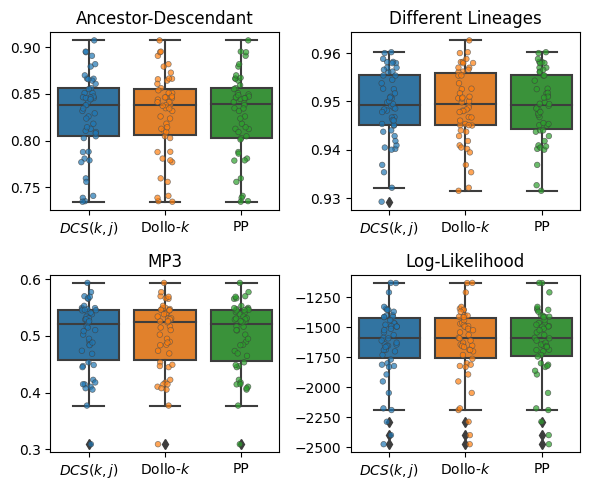

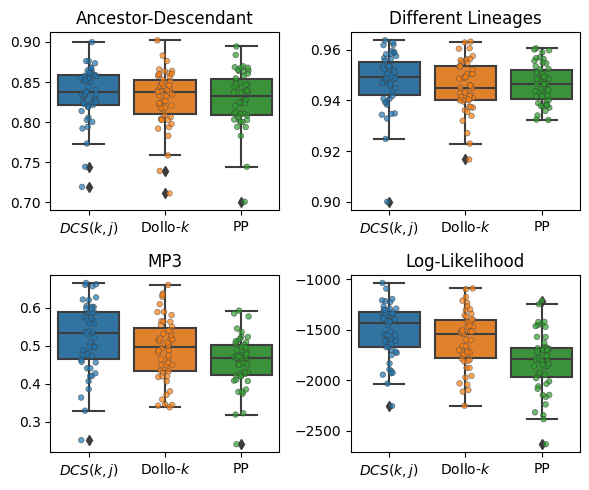

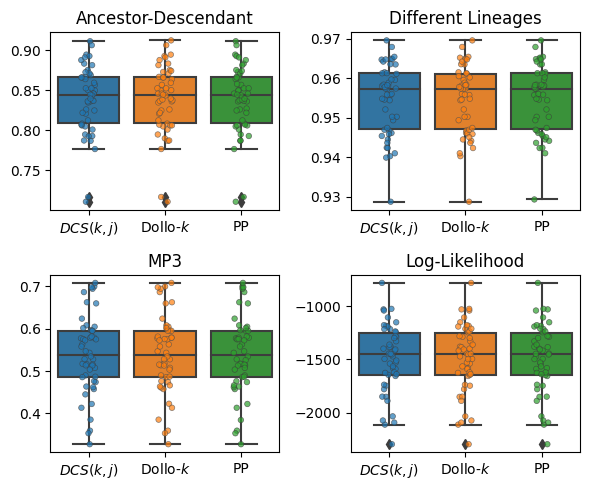

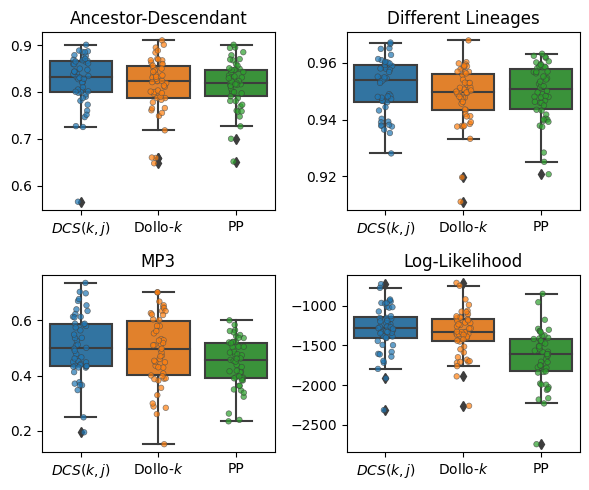

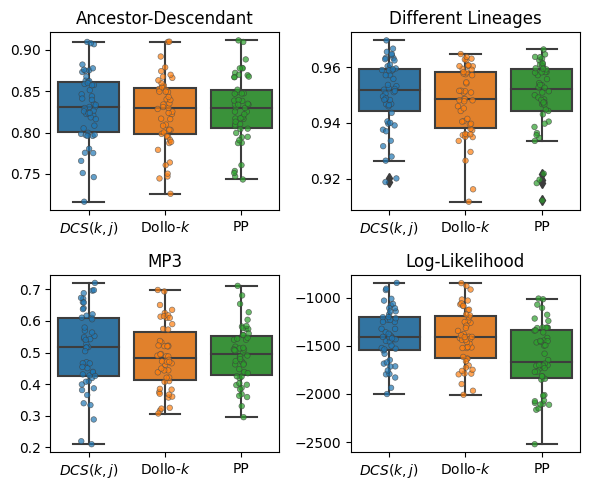

In [4]:
for exp in range(1, 6):
    boxplot([x.rename(columns={
        "reSASC": "$DCS(k,j)$", 
        "Dollo-k": "Dollo-$k$"
        }) for x in  load_data(exp)], out=f'plots/exp{exp}.pdf', 
    )
